In [ ]:
!pip install streamlit

In [ ]:
%%writefile main1.py
# Импортируем библиотеку
import streamlit as st
import requests
from zipfile import ZipFile
import gdown
from keras.models import load_model
import tensorflow as tf
import numpy as np

url_poets_model = 'https://storage.yandexcloud.net/datasetdz25/poets_model.zip'
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

st.title('Классификация авторов произведений')
st.subheader('Модель определяет, на какого из авторов больше похож стиль отрывка. Из предложенных авторов: Достоевский, Тургенев, Чехов, Горький, Брюсов.')
st.write('Пожалуйста, введите отрывок из литературы в поле ниже и нажмите "Классифицировать"')
text = st.text_area("Введите текст")

if st.button('Обучить модель'):
    st.write('Обучение модели...')
    output = 'poets_model.zip'
    gdown.download(url_poets_model, output, quiet=False)

    with ZipFile('poets_model.zip', 'r') as zip_ref:
        zip_ref.extractall()
    st.write('Идёт настройка модели...')

model_poets = load_model('poets_model')

if st.button('Классифицировать'):
  CLASS_LIST=["Достоевский", "Тургенев", "Чехов","Горький", "Брюсов"]
  max_words = 15000
  WIN_SIZE = 1000

  tokenizer = Tokenizer(num_words=max_words,
                    filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                    lower=True, split=' ', char_level=False)

  # Преобразование текста в последовательность чисел
  tokenizer.fit_on_texts([text])
  sequences = tokenizer.texts_to_sequences([text])
  X = pad_sequences(sequences, maxlen=WIN_SIZE)

  # Предсказание автора текста
  pred = model_poets.predict(X)
  predicted_class = CLASS_LIST[np.argmax(pred)]

  st.write('Автор: ', predicted_class)


Overwriting main1.py


In [ ]:
!streamlit run main1.py --server.address=localhost >/content/logs.txt & ssh -o "StrictHostKeyChecking no" -R 80:localhost:8501 serveo.net

Forwarding HTTP traffic from https://3b055f176a300883a98cea8161677d45.serveo.net
HTTP request from 217.172.18.174 to https://3b055f176a300883a98cea8161677d45.serveo.net/
HTTP request from 217.172.18.174 to https://3b055f176a300883a98cea8161677d45.serveo.net/static/media/SourceSansPro-Regular.0d69e5ff5e92ac64a0c9.woff2
HTTP request from 217.172.18.174 to https://3b055f176a300883a98cea8161677d45.serveo.net/static/media/SourceSansPro-SemiBold.abed79cd0df1827e18cf.woff2
HTTP request from 217.172.18.174 to https://3b055f176a300883a98cea8161677d45.serveo.net/static/media/SourceSansPro-Bold.118dea98980e20a81ced.woff2
HTTP request from 217.172.18.174 to https://3b055f176a300883a98cea8161677d45.serveo.net/static/css/main.3aaaea00.css
HTTP request from 217.172.18.174 to https://3b055f176a300883a98cea8161677d45.serveo.net/static/js/main.7e42f54d.js
HTTP request from 217.172.18.174 to https://3b055f176a300883a98cea8161677d45.serveo.net/_stcore/health
HTTP request from 217.172.18.174 to https://3b0

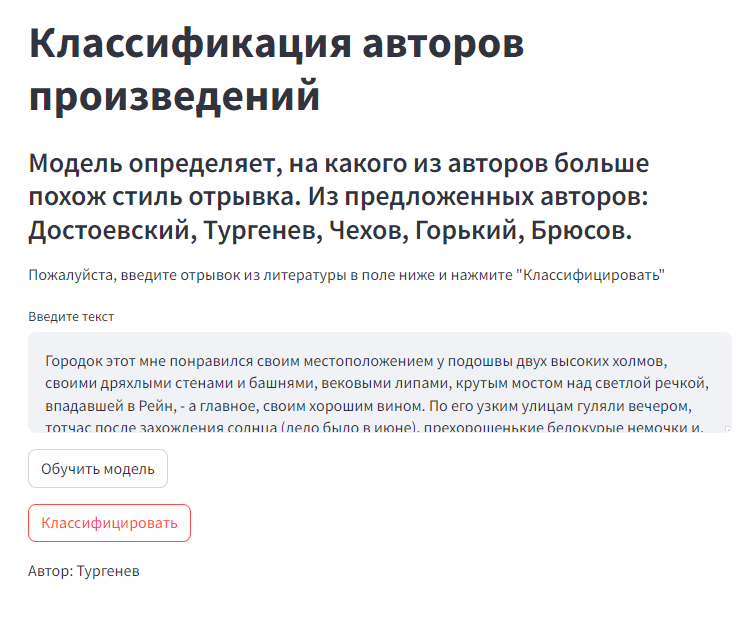